![Logo_unad](https://upload.wikimedia.org/wikipedia/commons/5/5f/Logo_unad.png)

<font size=3 color="midnightblue" face="arial">
<h1 align="center">Escuela de Ciencias Básicas, Tecnología e Ingeniería</h1>
</font>

<font size=3 color="navy" face="arial">
<h1 align="center">ECBTI</h1>
</font>

<font size=2 color="darkorange" face="arial">
<h1 align="center">Curso: Métodos Numéricos</h1>
</font>

<font size=2 color="midnightblue" face="arial">
<h1 align="center">Unidad 1: Error</h1>
</font>

<font size=1 color="darkorange" face="arial">
<h1 align="center">Febrero 28 de 2020</h1>
</font>


***

> **Tutor:** Carlos Alberto Álvarez Henao, I.C. D.Sc.

> **skype:** carlos.alberto.alvarez.henao

> **Herramienta:** [Jupyter](http://jupyter.org/)

> **Kernel:** Python 3.7


***

***Comentario:*** estas notas están basadas en el curso del profesor [Kyle T. Mandli](https://github.com/mandli/intro-numerical-methods) (en inglés)

# Fuentes de error

Los cálculos numéricos, que involucran el uso de máquinas (análogas o digitales) presentan una serie de errores que provienen de diferentes fuentes:

- del Modelo
- de los datos
- de truncamiento
- de representación de los números (punto flotante)
- $\ldots$

***Meta:*** Categorizar y entender cada tipo de error y explorar algunas aproximaciones simples para analizarlas.

# Error en el modelo y los datos

Errores en la formulación fundamental

- Error en los datos: imprecisiones en las mediciones o incertezas en los parámetros

Infortunadamente no tenemos control de los errores en los datos y el modelo de forma directa pero podemos usar métodos que pueden ser más robustos en la presencia de estos tipos de errores.

# Error de truncamiento

Los errores surgen de la expansión de funciones con una función simple, por ejemplo, $sin(x) \approx x$ para $|x|\approx0$.

# Error de  representación de punto fotante

Los errores surgen de aproximar números reales con la representación  en precisión finita de números en el computador.

# Definiciones básicas

Dado un valor verdadero de una función $f$ y una solución aproximada $F$, se define:

- Error absoluto

$$e_a=|f-F|$$

- Error relativo

$$e_r = \frac{e_a}{|f|}=\frac{|f-F|}{|f|}$$



# Notación $\text{Big}-\mathcal{O}$

sea $$f(x)= \mathcal{O}(g(x)) \text{ cuando } x \rightarrow a$$

si y solo si

$$|f(x)|\leq M|g(x)| \text{ cuando } |x-a| < \delta \text{ donde } M, a > 0$$


En la práctica, usamos la notación $\text{Big}-\mathcal{O}$ para decir algo sobre cómo se pueden comportar los términos que podemos haber dejado fuera de una serie. Veamos el siguiente ejemplo de la aproximación de la serie de Taylor:

***Ejemplo:***

sea $f(x) = \sin x$ con $x_0 = 0$ entonces

$$T_N(x) = \sum^N_{n=0} (-1)^{n} \frac{x^{2n+1}}{(2n+1)!}$$

Podemos escribir $f(x)$ como

$$f(x) = x - \frac{x^3}{6} + \frac{x^5}{120} + \mathcal{O}(x^7)$$

Esto se vuelve más útil cuando lo vemos como lo hicimos antes con $\Delta x$:

$$f(x) = \Delta x - \frac{\Delta x^3}{6} + \frac{\Delta x^5}{120} + \mathcal{O}(\Delta x^7)$$

# Reglas para el error de propagación basado en la notación $\text{Big}-\mathcal{O}$

En general, existen dos teoremas que no necesitan prueba y se mantienen cuando el valor de $x$ es grande:

Sea

$$\begin{aligned}
    f(x) &= p(x) + \mathcal{O}(x^n) \\
    g(x) &= q(x) + \mathcal{O}(x^m) \\
    k &= \max(n, m)
\end{aligned}$$

Entonces

$$
    f+g = p + q + \mathcal{O}(x^k)
$$

y

\begin{align}
    f \cdot g &= p \cdot q + p \mathcal{O}(x^m) + q \mathcal{O}(x^n) + O(x^{n + m}) \\
    &= p \cdot q + \mathcal{O}(x^{n+m})
\end{align}

De otra forma, si estamos interesados en valores pequeños de $x$, $\Delta x$, la expresión puede ser modificada como sigue:

\begin{align}
    f(\Delta x) &= p(\Delta x) + \mathcal{O}(\Delta x^n) \\
    g(\Delta x) &= q(\Delta x) + \mathcal{O}(\Delta x^m) \\
    r &= \min(n, m)
\end{align}

entonces

$$
    f+g = p + q + O(\Delta x^r)
$$

y

\begin{align}
    f \cdot g &= p \cdot q + p \cdot \mathcal{O}(\Delta x^m) + q \cdot \mathcal{O}(\Delta x^n) + \mathcal{O}(\Delta x^{n+m}) \\
    &= p \cdot q + \mathcal{O}(\Delta x^r)
\end{align}

***Nota:*** En este caso, supongamos que al menos el polinomio con $k=max(n,m)$ tiene la siguiente forma:

$$
    p(\Delta x) = 1 + p_1 \Delta x + p_2 \Delta x^2 + \ldots
$$

o

$$
    q(\Delta x) = 1 + q_1 \Delta x + q_2 \Delta x^2 + \ldots
$$

para que $\mathcal{O}(1)$ 


de modo que hay un término $\mathcal{O}(1)$ que garantiza la existencia de $\mathcal{O}(\Delta x^r)$ en el producto final.

Para tener una idea de por qué importa más la potencia en $\Delta x$ al considerar la convergencia, la siguiente figura muestra cómo las diferentes potencias en la tasa de convergencia pueden afectar la rapidez con la que converge nuestra solución. Tenga en cuenta que aquí estamos dibujando los mismos datos de dos maneras diferentes. Graficar el error como una función de $\Delta x$ es una forma común de mostrar que un método numérico está haciendo lo que esperamos y muestra el comportamiento de convergencia correcto. Dado que los errores pueden reducirse rápidamente, es muy común trazar este tipo de gráficos en una escala log-log para visualizar fácilmente los resultados. Tenga en cuenta que si un método fuera realmente del orden $n$, será una función lineal en el espacio log-log con pendiente $n$.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

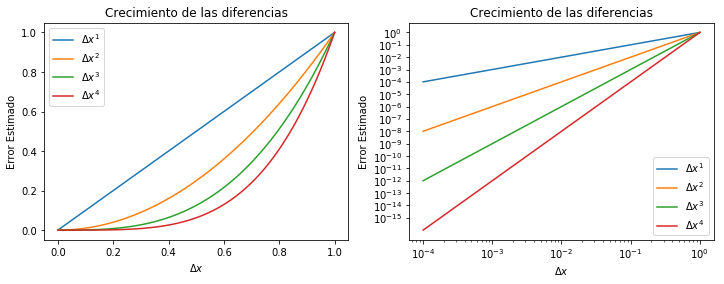

In [2]:
dx = np.linspace(1.0, 1e-4, 100)

fig = plt.figure()
fig.set_figwidth(fig.get_figwidth() * 2.0)
axes = []
axes.append(fig.add_subplot(1, 2, 1))
axes.append(fig.add_subplot(1, 2, 2))

for n in range(1, 5):
    axes[0].plot(dx, dx**n, label="$\Delta x^%s$" % n)
    axes[1].loglog(dx, dx**n, label="$\Delta x^%s$" % n)

axes[0].legend(loc=2)
axes[1].set_xticks([10.0**(-n) for n in range(5)])
axes[1].set_yticks([10.0**(-n) for n in range(16)])
axes[1].legend(loc=4)
for n in range(2):
    axes[n].set_title("Crecimiento del Error vs. $\Delta x^n$")
    axes[n].set_xlabel("$\Delta x$")
    axes[n].set_ylabel("Error Estimado")
    axes[n].set_title("Crecimiento de las diferencias")
    axes[n].set_xlabel("$\Delta x$")
    axes[n].set_ylabel("Error Estimado")

plt.show()

# Error de truncamiento

***Teorema de Taylor:*** Sea $f(x) \in C^{m+1}[a,b]$ y $x_0 \in [a,b]$, para todo $x \in (a,b)$ existe un número $c = c(x)$ que se encuentra entre $x_0$ y $x$ tal que

$$ f(x) = T_N(x) + R_N(x)$$

donde $T_N(x)$ es la aproximación del polinomio de Taylor

$$T_N(x) = \sum^N_{n=0} \frac{f^{(n)}(x_0)\times(x-x_0)^n}{n!}$$

y $R_N(x)$ es el residuo (la parte de la serie que obviamos)

$$R_N(x) = \frac{f^{(n+1)}(c) \times (x - x_0)^{n+1}}{(n+1)!}$$

Otra forma de pensar acerca de estos resultados consiste en reemplazar $x - x_0$ con $\Delta x$. La idea principal es que el residuo $R_N(x)$ se vuelve mas pequeño cuando $\Delta x \rightarrow 0$.

$$T_N(x) = \sum^N_{n=0} \frac{f^{(n)}(x_0)\times \Delta x^n}{n!}$$

y $R_N(x)$ es el residuo (la parte de la serie que obviamos)

$$ R_N(x) = \frac{f^{(n+1)}(c) \times \Delta x^{n+1}}{(n+1)!} \leq M \Delta x^{n+1}$$

***Ejemplo 1:***

$f(x) = e^x$ con $x_0 = 0$

Usando esto podemos encontrar expresiones para el error relativo y absoluto en función de $x$ asumiendo $N=2$.

Derivadas:
$$\begin{aligned}
    f'(x) &= e^x \\
    f''(x) &= e^x \\ 
    f^{(n)}(x) &= e^x
\end{aligned}$$

Polinomio de Taylor:
$$\begin{aligned}
    T_N(x) &= \sum^N_{n=0} e^0 \frac{x^n}{n!} \Rightarrow \\
    T_2(x) &= 1 + x + \frac{x^2}{2}
\end{aligned}$$

Restos:
$$\begin{aligned}
    R_N(x) &= e^c \frac{x^{n+1}}{(n+1)!} = e^c \times \frac{x^3}{6} \quad \Rightarrow \\
    R_2(x) &\leq \frac{e^1}{6} \approx 0.5
\end{aligned}$$

Precisión:
$$
    e^1 = 2.718\ldots \\
    T_2(1) = 2.5 \Rightarrow e \approx 0.2 ~~ r \approx 0.1
$$

¡También podemos usar el paquete `sympy` que tiene la capacidad de calcular el polinomio de *Taylor* integrado!

In [9]:
import sympy
x = sympy.symbols('x')
f = sympy.symbols('f', cls=sympy.Function)

f = sympy.exp(x)
f.series(x0=0, n=5)

1 + x + x**2/2 + x**3/6 + x**4/24 + O(x**5)

Graficando

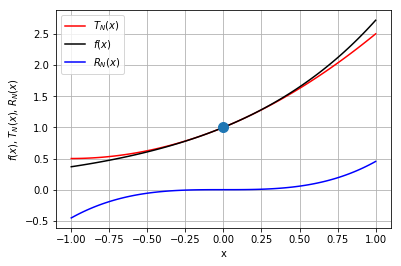

In [10]:
x = np.linspace(-1, 1, 100)
T_N = 1.0 + x + x**2 / 2.0
R_N = np.exp(1) * x**3 / 6.0

plt.plot(x, T_N, 'r', x, np.exp(x), 'k', x, R_N, 'b')
plt.plot(0.0, 1.0, 'o', markersize=10)
plt.grid(True)
plt.xlabel("x")
plt.ylabel("$f(x)$, $T_N(x)$, $R_N(x)$")
plt.legend(["$T_N(x)$", "$f(x)$", "$R_N(x)$"], loc=2)
plt.show()

***Ejemplo 2:***

Aproximar

$$ f(x) = \frac{1}{x} \quad x_0  = 1,$$

usando $x_0 = 1$ para el tercer termino de la serie de Taylor.

$$\begin{aligned}
    f'(x) &= -\frac{1}{x^2} \\
    f''(x) &= \frac{2}{x^3} \\
    f^{(n)}(x) &= \frac{(-1)^n n!}{x^{n+1}}
\end{aligned}$$

$$\begin{aligned}
    T_N(x) &= \sum^N_{n=0} (-1)^n (x-1)^n \Rightarrow \\
    T_2(x) &= 1 - (x - 1) + (x - 1)^2
\end{aligned}$$

$$\begin{aligned}
    R_N(x) &= \frac{(-1)^{n+1}(x - 1)^{n+1}}{c^{n+2}} \Rightarrow \\
    R_2(x) &= \frac{-(x - 1)^{3}}{c^{4}}
\end{aligned}$$

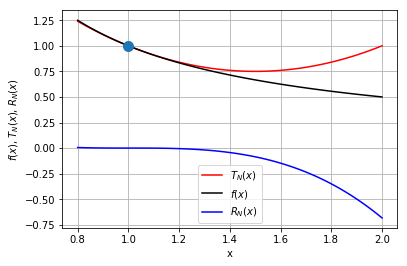

In [18]:
x = np.linspace(0.8, 2, 100)
T_N = 1.0 - (x-1) + (x-1)**2
R_N = -(x-1.0)**3 / (1.1**4)

plt.plot(x, T_N, 'r', x, 1.0 / x, 'k', x, R_N, 'b')
plt.plot(1.0, 1.0, 'o', markersize=10)
plt.grid(True)
plt.xlabel("x")
plt.ylabel("$f(x)$, $T_N(x)$, $R_N(x)$")

plt.legend(["$T_N(x)$", "$f(x)$", "$R_N(x)$"], loc=8)
plt.show()

# En esta celda haz tus comentarios


Esta cosa con esta vaina quizas tal vez-.-.--









## Error de punto flotante

Errores surgen de aproximar números reales con números de precisión finita

$$\pi \approx 3.14$$

o $\frac{1}{3} \approx 0.333333333$ en decimal, los resultados forman un número finito de registros para representar cada número.

### Sistemas de punto flotante

Los números en sistemas de punto flotante se representan como una serie de bits que representan diferentes partes de un número. En los sistemas de punto flotante normalizados, existen algunas convenciones estándar para el uso de estos bits. En general, los números se almacenan dividiéndolos en la forma

$$F = \pm d_1 . d_2 d_3 d_4 \ldots d_p \times \beta^E$$

donde

1. $\pm$ es un bit único y representa el signo del número.


2. $d_1 . d_2 d_3 d_4 \ldots d_p$ es la *mantisa*. observe que, técnicamente, el decimal se puede mover, pero en general, utilizando la notación científica, el decimal siempre se puede colocar en esta ubicación. Los digitos $d_2 d_3 d_4 \ldots d_p$ son llamados la *fracción* con $p$ digitos de precisión. Los sistemas normalizados específicamente ponen el punto decimal en el frente y asume $d_1 \neq 0$ a menos que el número sea exactamente $0$.


3. $\beta$ es la *base*. Para el sistema binario $\beta = 2$, para decimal $\beta = 10$, etc.


4. $E$ es el *exponente*, un entero en el rango $[E_{\min}, E_{\max}]$

Los puntos importantes en cualquier sistema de punto flotante es

1. Existe un conjunto discreto y finito de números representables.


2. Estos números representables no están distribuidos uniformemente en la línea real


3. La aritmética en sistemas de punto flotante produce resultados diferentes de la aritmética de precisión infinita (es decir, matemática "real")

### Propiedades de los sistemas de punto flotante

Todos los sistemas de punto flotante se caracterizan por varios números importantes

- Número normalizado reducido (underflow si está por debajo, relacionado con números sub-normales alrededor de cero)


- Número normalizado más grande (overflow)


- Cero


- $\epsilon$ o $\epsilon_{mach}$


- `Inf` y `nan`

***Ejemplo: Sistema de juguete***

Considere el sistema decimal de 2 digitos de  precisión (normalizado)

$$f = \pm d_1 . d_2 \times 10^E$$

con $E \in [-2, 0]$.

**Numero y distribución de números**


1. Cuántos números pueden representarse con este sistema?


2. Cuál es la distribución en la línea real?


3. Cuáles son los límites underflow y overflow?

Cuántos números pueden representarse con este sistema?

$$f = \pm d_1 . d_2 \times 10^E ~~~ \text{with} E \in [-2, 0]$$

$$2 \times 9 \times 10 \times 3 + 1 = 541$$

Cuál es la distribución en la línea real?

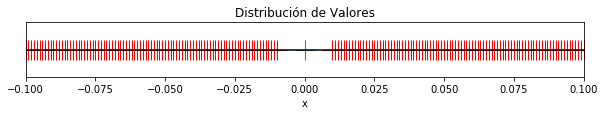

In [12]:
d_1_values = [1, 2, 3, 4, 5, 6, 7, 8, 9]
d_2_values = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
E_values = [0, -1, -2]

fig = plt.figure(figsize=(10.0, 1.0))
axes = fig.add_subplot(1, 1, 1)

for E in E_values:
    for d1 in d_1_values:
        for d2 in d_2_values:
            axes.plot( (d1 + d2 * 0.1) * 10**E, 0.0, 'r+', markersize=20)
            axes.plot(-(d1 + d2 * 0.1) * 10**E, 0.0, 'r+', markersize=20)
            
axes.plot(0.0, 0.0, '+', markersize=20)
axes.plot([-10.0, 10.0], [0.0, 0.0], 'k')

axes.set_title("Distribución de Valores")
axes.set_yticks([])
axes.set_xlabel("x")
axes.set_ylabel("")
axes.set_xlim([-0.1, 0.1])
plt.show()

Cuáles son los límites superior (overflow) e inferior (underflow)?

- El menor número que puede ser representado (underflow) es: $1.0 \times 10^{-2} = 0.01$



- El mayor número que puede ser representado (overflow) es:  $9.9 \times 10^0 = 9.9$

### Sistema Binario

Considere el sistema en base 2 de 2 dígitos de precisión

$$f=\pm d_1 . d_2 \times 2^E \quad \text{with} \quad E \in [-1, 1]$$


#### Numero y distribución de números**


1. Cuántos números pueden representarse con este sistema?


2. Cuál es la distribución en la línea real?


3. Cuáles son los límites underflow y overflow?

Cuántos números pueden representarse en este sistema?


$$f=\pm d_1 . d_2 \times 2^E ~~~~ \text{con} ~~~~ E \in [-1, 1]$$

$$ 2 \times 1 \times 2 \times 3 + 1 = 13$$

Cuál es la distribución en la línea real?

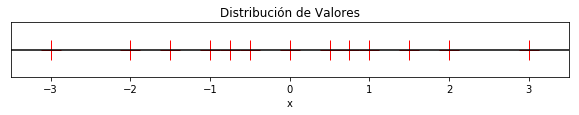

In [14]:
d_1_values = [1]
d_2_values = [0, 1]
E_values = [1, 0, -1]

fig = plt.figure(figsize=(10.0, 1.0))
axes = fig.add_subplot(1, 1, 1)

for E in E_values:
    for d1 in d_1_values:
        for d2 in d_2_values:
            axes.plot( (d1 + d2 * 0.5) * 2**E, 0.0, 'r+', markersize=20)
            axes.plot(-(d1 + d2 * 0.5) * 2**E, 0.0, 'r+', markersize=20)
            
axes.plot(0.0, 0.0, 'r+', markersize=20)
axes.plot([-4.5, 4.5], [0.0, 0.0], 'k')

axes.set_title("Distribución de Valores")
axes.set_yticks([])
axes.set_xlabel("x")
axes.set_ylabel("")
axes.set_xlim([-3.5, 3.5])
plt.show()

Cuáles son los límites superior (*overflow*) e inferior (*underflow*)?

- El menor número que puede ser representado (*underflow*) es: $1.0 \times 2^{-1} = 0.5$




- El mayor número que puede ser representado (*overflow*) es:  $1.1 \times 2^1 = 3$

Observe que estos números son en sistema binario. 

Una rápida regla de oro:

$$2^3 2^2 2^1 2^0 . 2^{-1} 2^{-2} 2^{-3}$$

corresponde a

8s, 4s, 2s, 1s . mitades, cuartos, octavos, $\ldots$

### Sistema real - IEEE 754 sistema binario de punto flotante

#### Precisión simple

- Almacenamiento total es de 32 bits


- Exponente de 8 bits $\Rightarrow E \in [-126, 127]$


- Fracción 23 bits ($p = 24$)


```
s EEEEEEEE FFFFFFFFFFFFFFFFFFFFFFF
0 1      8 9                     31
```

Overflow $= 2^{127} \approx 3.4 \times 10^{38}$

Underflow $= 2^{-126} \approx 1.2 \times 10^{-38}$

$\epsilon_{\text{machine}} = 2^{-23} \approx 1.2 \times 10^{-7}$


#### Precisión doble

- Almacenamiento total asignado es 64 bits

- Exponenete de 11 bits $\Rightarrow E \in [-1022, 1024]$

- Fracción de 52 bits ($p = 53$)

```
s EEEEEEEEEE FFFFFFFFFF FFFFFFFFFF FFFFFFFFFF FFFFFFFFFF FFFFFFFFFF FF
0 1       11 12                                                      63
```
Overflow $= 2^{1024} \approx 1.8 \times 10^{308}$

Underflow $= 2^{-1022} \approx 2.2 \times 10^{-308}$

$\epsilon_{\text{machine}} = 2^{-52} \approx 2.2 \times 10^{-16}$

### Acceso de Python a números de la IEEE

Accede a muchos parámetros importantes, como el epsilon de la máquina

```python
import numpy
numpy.finfo(float).eps
```

In [15]:
import numpy
numpy.finfo(float).eps

print(numpy.finfo(numpy.float16))
print(numpy.finfo(numpy.float32))
print(numpy.finfo(float))
print(numpy.finfo(numpy.float128))

Machine parameters for float16
---------------------------------------------------------------
precision =   3   resolution = 1.00040e-03
machep =    -10   eps =        9.76562e-04
negep =     -11   epsneg =     4.88281e-04
minexp =    -14   tiny =       6.10352e-05
maxexp =     16   max =        6.55040e+04
nexp =        5   min =        -max
---------------------------------------------------------------

Machine parameters for float32
---------------------------------------------------------------
precision =   6   resolution = 1.0000000e-06
machep =    -23   eps =        1.1920929e-07
negep =     -24   epsneg =     5.9604645e-08
minexp =   -126   tiny =       1.1754944e-38
maxexp =    128   max =        3.4028235e+38
nexp =        8   min =        -max
---------------------------------------------------------------

Machine parameters for float64
---------------------------------------------------------------
precision =  15   resolution = 1.0000000000000001e-15
machep =    -52   e

AttributeError: module 'numpy' has no attribute 'float128'

## Por qué debería importarnos esto?

- Aritmética de punto flotante no es conmutativa o asociativa


- Errores de punto flotante compuestos, No asuma que la precisión doble es suficiente


- Mezclar precisión es muy peligroso

### Ejemplo 1: Aritmética simple

Aritmética simple $\delta < \epsilon_{\text{machine}}$

   $$(1+\delta) - 1 = 1 - 1 = 0$$

   $$1 - 1 + \delta = \delta$$

### Ejemplo 2: Cancelación catastrófica

Miremos qué sucede cuando sumamos dos números $x$ y $y$ cuando $x+y \neq 0$. De hecho, podemos estimar estos límites haciendo un análisis de error. Aquí necesitamos presentar la idea de que cada operación de punto flotante introduce un error tal que

$$
    \text{fl}(x ~\text{op}~ y) = (x ~\text{op}~ y) (1 + \delta)
$$

donde $\text{fl}(\cdot)$ es una función que devuelve la representación de punto flotante de la expresión encerrada, $\text{op}$ es alguna operación (ex. $+, -, \times, /$), y $\delta$ es el error de punto flotante debido a  $\text{op}$.

De vuelta a nuestro problema en cuestión. El error de coma flotante debido a la suma es

$$\text{fl}(x + y) = (x + y) (1 + \delta).$$


Comparando esto con la solución verdadera usando un error relativo tenemos

$$\begin{aligned}
    \frac{(x + y) - \text{fl}(x + y)}{x + y} &= \frac{(x + y) - (x + y) (1 + \delta)}{x + y} = \delta.
\end{aligned}$$

entonces si $\delta = \mathcal{O}(\epsilon_{\text{machine}})$ no estaremos muy preocupados.

Que pasa si consideramos un error de punto flotante en la representación de $x$ y $y$, $x \neq y$, y decimos que $\delta_x$ y $\delta_y$ son la magnitud de los errores en su representación. Asumiremos que esto constituye el error de punto flotante en lugar de estar asociado con la operación en sí.

Dado todo esto, tendríamos

$$\begin{aligned}
    \text{fl}(x + y) &= x (1 + \delta_x) + y (1 + \delta_y) \\
    &= x + y + x \delta_x + y \delta_y \\
    &= (x + y) \left(1 + \frac{x \delta_x + y \delta_y}{x + y}\right)
\end{aligned}$$

Calculando nuevamente el error relativo, tendremos

$$\begin{aligned}
    \frac{x + y - (x + y) \left(1 + \frac{x \delta_x + y \delta_y}{x + y}\right)}{x + y} &= 1 - \left(1 + \frac{x \delta_x + y \delta_y}{x + y}\right) \\
    &= \frac{x}{x + y} \delta_x + \frac{y}{x + y} \delta_y \\
    &= \frac{1}{x + y} (x \delta_x + y \delta_y)
\end{aligned}$$

Lo importante aquí es que ahora el error depende de los valores de $x$ y $y$, y más importante aún, su suma. De particular preocupación es el tamaño relativo de $x + y$. A medida que se acerca a cero en relación con las magnitudes de $x$ y $y$, el error podría ser arbitrariamente grande. Esto se conoce como ***cancelación catastrófica***.

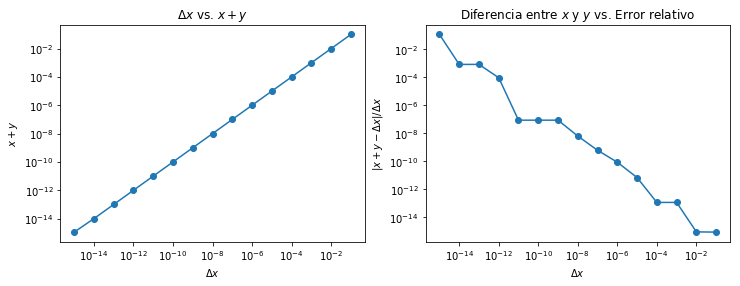

In [16]:
dx = numpy.array([10**(-n) for n in range(1, 16)])
x = 1.0 + dx
y = -numpy.ones(x.shape)
error = numpy.abs(x + y - dx) / (dx)

fig = plt.figure()
fig.set_figwidth(fig.get_figwidth() * 2)

axes = fig.add_subplot(1, 2, 1)
axes.loglog(dx, x + y, 'o-')
axes.set_xlabel("$\Delta x$")
axes.set_ylabel("$x + y$")
axes.set_title("$\Delta x$ vs. $x+y$")

axes = fig.add_subplot(1, 2, 2)
axes.loglog(dx, error, 'o-')
axes.set_xlabel("$\Delta x$")
axes.set_ylabel("$|x + y - \Delta x| / \Delta x$")
axes.set_title("Diferencia entre $x$ y $y$ vs. Error relativo")

plt.show()

### Ejemplo 3: Evaluación de una función

Considere la función

$$
    f(x) = \frac{1 - \cos x}{x^2}
$$

con $x\in[-10^{-4}, 10^{-4}]$. 

Tomando el límite cuando $x \rightarrow 0$ podemos ver qué comportamiento esperaríamos ver al evaluar esta función:

$$
    \lim_{x \rightarrow 0} \frac{1 - \cos x}{x^2} = \lim_{x \rightarrow 0} \frac{\sin x}{2 x} = \lim_{x \rightarrow 0} \frac{\cos x}{2} = \frac{1}{2}.
$$

¿Qué hace la representación de punto flotante?

Text(0,0.5,'Error Relativo')

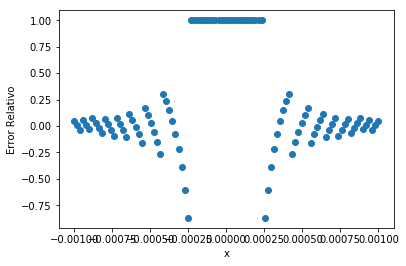

In [17]:
x = numpy.linspace(-1e-3, 1e-3, 100, dtype=numpy.float32)
error = (0.5 - (1.0 - numpy.cos(x)) / x**2) / 0.5

fig = plt.figure()
axes = fig.add_subplot(1, 1, 1)
axes.plot(x, error, 'o')
axes.set_xlabel("x")
axes.set_ylabel("Error Relativo")

### Ejemplo 4: Evaluación de un Polinomio

 $$f(x) = x^7 - 7x^6 + 21 x^5 - 35 x^4 + 35x^3-21x^2 + 7x - 1$$

In [ ]:
x = numpy.linspace(0.988, 1.012, 1000, dtype=numpy.float16)
y = x**7 - 7.0 * x**6 + 21.0 * x**5 - 35.0 * x**4 + 35.0 * x**3 - 21.0 * x**2 + 7.0 * x - 1.0

fig = plt.figure()
axes = fig.add_subplot(1, 1, 1)
axes.plot(x, y, 'r')
axes.set_xlabel("x")
axes.set_ylabel("y")
axes.set_ylim((-0.1, 0.1))
axes.set_xlim((x[0], x[-1]))
plt.show()

### Ejemplo 5: Evaluación de una función racional

Calcule $f(x) = x + 1$ por la función $$F(x) = \frac{x^2 - 1}{x - 1}$$

¿Cuál comportamiento esperarías encontrar?

In [ ]:
x = numpy.linspace(0.5, 1.5, 101, dtype=numpy.float16)
f_hat = (x**2 - 1.0) / (x - 1.0)

fig = plt.figure()
axes = fig.add_subplot(1, 1, 1)
axes.plot(x, numpy.abs(f_hat - (x + 1.0)))
axes.set_xlabel("$x$")
axes.set_ylabel("Error Absoluto")
plt.show()

## Combinación de error

En general, nos debemos ocupar de la combinación de error de truncamiento con el error de punto flotante.

- Error de Truncamiento: errores que surgen de la aproximación de una función, truncamiento de una serie.

$$\sin x \approx x - \frac{x^3}{3!} + \frac{x^5}{5!} + O(x^7)$$


- Error de punto flotante: errores derivados de la aproximación de números reales con números de precisión finita

$$\pi \approx 3.14$$

o $\frac{1}{3} \approx 0.333333333$ en decimal, los resultados forman un número finito de registros para representar cada número.

### Ejemplo 1:

Considere la aproximación de diferencias finitas donde $f(x) = e^x$ y estamos evaluando en $x=1$

$$f'(x) \approx \frac{f(x + \Delta x) - f(x)}{\Delta x}$$

Compare el error entre disminuir $\Delta x$ y la verdadera solucion $f'(1) = e$

In [ ]:
delta_x = numpy.linspace(1e-20, 5.0, 100)
delta_x = numpy.array([2.0**(-n) for n in range(1, 60)])
x = 1.0
f_hat_1 = (numpy.exp(x + delta_x) - numpy.exp(x)) / (delta_x)
f_hat_2 = (numpy.exp(x + delta_x) - numpy.exp(x - delta_x)) / (2.0 * delta_x)

fig = plt.figure()
axes = fig.add_subplot(1, 1, 1)
axes.loglog(delta_x, numpy.abs(f_hat_1 - numpy.exp(1)), 'o-', label="Unilateral")
axes.loglog(delta_x, numpy.abs(f_hat_2 - numpy.exp(1)), 's-', label="Centrado")
axes.legend(loc=3)
axes.set_xlabel("$\Delta x$")
axes.set_ylabel("Error Absoluto")
plt.show()

### Ejemplo 2:

Evalúe $e^x$ con la serie de *Taylor*

$$e^x = \sum^\infty_{n=0} \frac{x^n}{n!}$$

podemos elegir $n< \infty$ que puede aproximarse $e^x$ en un rango dado $x \in [a,b]$ tal que el error relativo $E$ satisfaga $E<8 \cdot \varepsilon_{\text{machine}}$?

¿Cuál podría ser una mejor manera de simplemente evaluar el polinomio de Taylor directamente por varios $N$?

In [ ]:
import scipy.special

def my_exp(x, N=10):
    value = 0.0
    for n in range(N + 1):
        value += x**n / scipy.special.factorial(n)
        
    return value

x = numpy.linspace(-2, 2, 100, dtype=numpy.float32)
for N in range(1, 50):
    error = numpy.abs((numpy.exp(x) - my_exp(x, N=N)) / numpy.exp(x))
    if numpy.all(error < 8.0 * numpy.finfo(float).eps):
        break

print(N)

fig = plt.figure()
axes = fig.add_subplot(1, 1, 1)
axes.plot(x, error)
axes.set_xlabel("x")
axes.set_ylabel("Error Relativo")
plt.show()

### Ejemplo 3: Error relativo

Digamos que queremos calcular el error relativo de dos valores $x$ y $y$ usando $x$ como valor de normalización

$$
    E = \frac{x - y}{x}
$$
y
$$
    E = 1 - \frac{y}{x}
$$

son equivalentes. En precisión finita, ¿qué forma pidría esperarse que sea más precisa y por qué?

Ejemplo tomado de [blog](https://nickhigham.wordpress.com/2017/08/14/how-and-how-not-to-compute-a-relative-error/) posteado por Nick Higham*

Usando este modelo, la definición original contiene dos operaciones de punto flotante de manera que

$$\begin{aligned}
    E_1 = \text{fl}\left(\frac{x - y}{x}\right) &= \text{fl}(\text{fl}(x - y) / x) \\
    &= \left[ \frac{(x - y) (1 + \delta_+)}{x} \right ] (1 + \delta_/) \\
    &= \frac{x - y}{x}  (1 + \delta_+) (1 + \delta_/)
\end{aligned}$$

Para la otra formulación tenemos

$$\begin{aligned}
    E_2 = \text{fl}\left( 1 - \frac{y}{x} \right ) &= \text{fl}\left(1 - \text{fl}\left(\frac{y}{x}\right) \right) \\
    &= \left(1 - \frac{y}{x} (1 + \delta_/) \right) (1 + \delta_-)
\end{aligned}$$

Si suponemos que todos las $\text{op}$s tienen magnitudes de error similares, entonces podemos simplificar las cosas dejando que 

$$
    |\delta_\ast| \le \epsilon.
$$

Para comparar las dos formulaciones, nuevamente usamos el error relativo entre el error relativo verdadero $e_i$ y nuestras versiones calculadas $E_i$

Definición original

$$\begin{aligned}
    \frac{e - E_1}{e} &= \frac{\frac{x - y}{x} - \frac{x - y}{x}  (1 + \delta_+) (1 + \delta_/)}{\frac{x - y}{x}} \\
    &\le 1 - (1 + \epsilon) (1 + \epsilon) = 2 \epsilon + \epsilon^2
\end{aligned}$$

Definición manipulada:

$$\begin{aligned}
    \frac{e - E_2}{e} &= \frac{e - \left[1 - \frac{y}{x}(1 + \delta_/) \right] (1 + \delta_-)}{e} \\
    &= \frac{e - \left[e - \frac{y}{x} \delta_/) \right] (1 + \delta_-)}{e} \\
    &= \frac{e - \left[e + e\delta_- - \frac{y}{x} \delta_/ - \frac{y}{x} \delta_/ \delta_-)) \right] }{e} \\
    &= - \delta_- + \frac{1}{e} \frac{y}{x} \left(\delta_/ + \delta_/ \delta_- \right) \\
    &= - \delta_- + \frac{1 -e}{e} \left(\delta_/ + \delta_/ \delta_- \right) \\
    &\le \epsilon + \left |\frac{1 - e}{e}\right | (\epsilon + \epsilon^2)
\end{aligned}$$

Vemos entonces que nuestro error de punto flotante dependerá de la magnitud relativa de $e$

In [ ]:
# Based on the code by Nick Higham
# https://gist.github.com/higham/6f2ce1cdde0aae83697bca8577d22a6e
# Compares relative error formulations using single precision and compared to double precision

N = 501    # Note: Use 501 instead of 500 to avoid the zero value
d = numpy.finfo(numpy.float32).eps * 1e4
a = 3.0
x = a * numpy.ones(N, dtype=numpy.float32)
y = [x[i] + numpy.multiply((i - numpy.divide(N, 2.0, dtype=numpy.float32)), d, dtype=numpy.float32) for i in range(N)]

# Compute errors and "true" error
relative_error = numpy.empty((2, N), dtype=numpy.float32)
relative_error[0, :] = numpy.abs(x - y) / x
relative_error[1, :] = numpy.abs(1.0 - y / x)
exact = numpy.abs( (numpy.float64(x) - numpy.float64(y)) / numpy.float64(x))

# Compute differences between error calculations
error = numpy.empty((2, N))
for i in range(2):
    error[i, :] = numpy.abs((relative_error[i, :] - exact) / numpy.abs(exact))

fig = plt.figure()
axes = fig.add_subplot(1, 1, 1)
axes.semilogy(y, error[0, :], '.', markersize=10, label="$|x-y|/|x|$")
axes.semilogy(y, error[1, :], '.', markersize=10, label="$|1-y/x|$")

axes.grid(True)
axes.set_xlabel("y")
axes.set_ylabel("Error Relativo")
axes.set_xlim((numpy.min(y), numpy.max(y)))
axes.set_ylim((5e-9, numpy.max(error[1, :])))
axes.set_title("Comparasión Error Relativo")
axes.legend()
plt.show()

Algunos enlaces de utilidad con respecto al punto flotante IEEE:

- [What Every Computer Scientist Should Know About Floating-Point Arithmetic](http://docs.oracle.com/cd/E19957-01/806-3568/ncg_goldberg.html)


- [IEEE 754 Floating Point Calculator](http://babbage.cs.qc.edu/courses/cs341/IEEE-754.html)


- [Numerical Computing with IEEE Floating Point Arithmetic](http://epubs.siam.org/doi/book/10.1137/1.9780898718072)

## Operaciones de conteo

- ***Error de truncamiento:*** *¿Por qué no usar más términos en la serie de Taylor?*


- ***Error de punto flotante:*** *¿Por qué no utilizar la mayor precisión posible?*

### Ejemplo 1: Multiplicación matriz - vector

Sea $A, B \in \mathbb{R}^{N \times N}$ y $x \in \mathbb{R}^N$.

1. Cuenta el número aproximado de operaciones que tomará para calcular $Ax$

2. Hacer lo mismo para $AB$

***Producto Matriz-vector:*** Definiendo $[A]_i$ como la $i$-ésima fila de $A$ y $A_{ij}$ como la $i$,$j$-ésima entrada entonces

$$
    A x = \sum^N_{i=1} [A]_i \cdot x = \sum^N_{i=1} \sum^N_{j=1} A_{ij} x_j
$$

Tomando un caso en particular, siendo $N=3$, entonces la operación de conteo es

$$
    A x = [A]_1 \cdot v + [A]_2 \cdot v + [A]_3 \cdot v = \begin{bmatrix}
        A_{11} \times v_1 + A_{12} \times v_2 + A_{13} \times v_3 \\
        A_{21} \times v_1 + A_{22} \times v_2 + A_{23} \times v_3 \\
        A_{31} \times v_1 + A_{32} \times v_2 + A_{33} \times v_3
    \end{bmatrix}
$$

Esto son 15 operaciones (6 sumas y 9 multiplicaciones)

Tomando otro caso, siendo $N=4$, entonces el conteo de operaciones es:

$$
    A x = [A]_1 \cdot v + [A]_2 \cdot v + [A]_3 \cdot v = \begin{bmatrix}
        A_{11} \times v_1 + A_{12} \times v_2 + A_{13} \times v_3 + A_{14} \times v_4 \\
        A_{21} \times v_1 + A_{22} \times v_2 + A_{23} \times v_3 + A_{24} \times v_4 \\
        A_{31} \times v_1 + A_{32} \times v_2 + A_{33} \times v_3 + A_{34} \times v_4 \\
        A_{41} \times v_1 + A_{42} \times v_2 + A_{43} \times v_3 + A_{44} \times v_4 \\
    \end{bmatrix}
$$

Esto lleva a 28 operaciones (12 sumas y 16 multiplicaciones).

Generalizando, hay $N^2$ mutiplicaciones y $N(N-1)$ sumas para un total de 

$$
    \text{operaciones} = N (N - 1) + N^2 = \mathcal{O}(N^2).
$$

***Producto Matriz-Matriz ($AB$):*** Definiendo $[B]_j$ como la $j$-ésima columna de $B$ entonces

$$
    (A B)_{ij} = \sum^N_{i=1} \sum^N_{j=1} [A]_i \cdot [B]_j
$$

El producto interno de dos vectores es representado por 

$$
    a \cdot b = \sum^N_{i=1} a_i b_i
$$

conduce a $\mathcal{O}(3N)$ operaciones. Como hay $N^2$ entradas en la matriz resultante, tendríamos $\mathcal{O}(N^3)$ operaciones

Existen métodos para realizar la multiplicación matriz - matriz más rápido. En la siguiente figura vemos una colección de algoritmos a lo largo del tiempo que han podido limitar el número de operaciones en ciertas circunstancias
$$
    \mathcal{O}(N^\omega)
$$
![matrix multiplication operation bound](./images/bound_matrix_multiply.png)

### Ejemplo 2: Método de Horner para evaluar polinomios

Dado

$$P_N(x) = a_0 + a_1 x + a_2 x^2 + \ldots + a_N x^N$$ 

o


$$P_N(x) = p_1 x^N + p_2 x^{N-1} + p_3 x^{N-2} + \ldots + p_{N+1}$$

queremos encontrar la mejor vía para evaluar $P_N(x)$

Primero considere dos vías para escribir $P_3$

$$ P_3(x) = p_1 x^3 + p_2 x^2 + p_3 x + p_4$$

y usando multiplicación anidada

$$ P_3(x) = ((p_1 x + p_2) x + p_3) x + p_4$$

Considere cuántas operaciones se necesitan para cada...

$$ P_3(x) = p_1 x^3 + p_2 x^2 + p_3 x + p_4$$

$$P_3(x) = \overbrace{p_1 \cdot x \cdot x \cdot x}^3 + \overbrace{p_2 \cdot x \cdot x}^2 + \overbrace{p_3 \cdot x}^1 + p_4$$

Sumando todas las operaciones, en general podemos pensar en esto como una pirámide

![Original Count](./images/horners_method_big_count.png)

podemos estimar de esta manera que el algoritmo escrito de esta manera tomará aproximadamente $\mathcal{O}(N^2/2)$ operaciones para completar.

Mirando nuetros otros medios de evaluación

$$ P_3(x) = ((p_1 x + p_2) x + p_3) x + p_4$$

Aquí encontramos que el método es $\mathcal{O}(N)$ (el 2 generalmente se ignora en estos casos). Lo importante es que la primera evaluación es $\mathcal{O}(N^2)$ y la segunda $\mathcal{O}(N)$!

### Algoritmo


Complete la función e implemente el método de *Horner*

```python
def eval_poly(p, x):
    """Evaluates polynomial given coefficients p at x
    
    Function to evaluate a polynomial in order N operations.  The polynomial is defined as
    
    P(x) = p[0] x**n + p[1] x**(n-1) + ... + p[n-1] x + p[n]
    
    The value x should be a float.
    """
    pass
```

In [ ]:
def eval_poly(p, x):
    """Evaluates polynomial given coefficients p at x
    
    Function to evaluate a polynomial in order N operations.  The polynomial is defined as
    
    P(x) = p[0] x**n + p[1] x**(n-1) + ... + p[n-1] x + p[n]
    
    The value x should be a float.
    """
    ### ADD CODE HERE
    pass

In [ ]:
# Scalar version
def eval_poly(p, x):
    """Evaluates polynomial given coefficients p at x
    
    Function to evaluate a polynomial in order N operations.  The polynomial is defined as
    
    P(x) = p[0] x**n + p[1] x**(n-1) + ... + p[n-1] x + p[n]
    
    The value x should be a float.
    """
    
    y = p[0]
    for coefficient in p[1:]:
        y = y * x + coefficient
    
    return y

# Vectorized version
def eval_poly(p, x):
    """Evaluates polynomial given coefficients p at x
    
    Function to evaluate a polynomial in order N operations.  The polynomial is defined as
    
    P(x) = p[0] x**n + p[1] x**(n-1) + ... + p[n-1] x + p[n]
    
    The value x can by a NumPy ndarray.
    """
    
    y = numpy.ones(x.shape) * p[0]
    for coefficient in p[1:]:
        y = y * x + coefficient
    
    return y

p = [1, -3, 10, 4, 5, 5]
x = numpy.linspace(-10, 10, 100)
plt.plot(x, eval_poly(p, x))
plt.show()